#### Prepare the data

In [1]:
data_url = """http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz"""
fn = data_url.split("/")[-1]

import urllib.request
urllib.request.urlretrieve(data_url, fn)
!tar zxf review_polarity.tar.gz
!ls

Assignment_1.ipynb      Untitled.ipynb          past tense.pdf
ML_lab_1.ipynb          english_past_tense.arff poldata.README.2.0
ML_lab_1_new.ipynb      german_plural.arff      review_polarity.tar.gz
ML_lab_2.ipynb          past tense              txt_sentoken


In [2]:
!head -n15 poldata.README.2.0

In [3]:
import os
filenames = list()
for root, dirs, files in os.walk("./txt_sentoken"):
   for name in files:
      filenames.append(os.path.join(root, name))
print("Found %i files" % len(filenames))

Found 2000 files


In [4]:
import numpy as np

X_txt = list()
y = list()
import random
random.shuffle(filenames)
for i, fn in enumerate(filenames):
  if fn.find("/pos/") > 0:
    msg = "positive"
    y.append(1)
  else:
    msg = "negative"
    y.append(-1)
  with open(fn) as f:
    X_txt.append(f.read())
  if i < 10:
    print(fn, msg, "example")

y = np.asarray(y)
assert len(X_txt) == y.shape[0]

./txt_sentoken/neg/cv125_9636.txt negative example
./txt_sentoken/neg/cv061_9321.txt negative example
./txt_sentoken/pos/cv503_10558.txt positive example
./txt_sentoken/pos/cv831_14689.txt positive example
./txt_sentoken/pos/cv310_13091.txt positive example
./txt_sentoken/neg/cv481_7930.txt negative example
./txt_sentoken/pos/cv222_17395.txt positive example
./txt_sentoken/neg/cv848_10061.txt negative example
./txt_sentoken/pos/cv976_10267.txt positive example
./txt_sentoken/pos/cv094_27889.txt positive example


2000 documents in X_txt
2000 labels in y


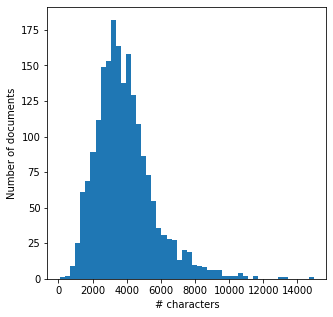

In [5]:
print("%i documents in X_txt" % len(X_txt))
print("%i labels in y" % len(y))

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.hist([len(x) for x in X_txt], 50)
plt.ylabel("Number of documents")
plt.xlabel("# characters")
plt.show()

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_txt)
X = vectorizer.transform(X_txt)
X[X>1] = 1
words = vectorizer.get_feature_names()

In [7]:
X

<2000x39659 sparse matrix of type '<class 'numpy.int64'>'
	with 666842 stored elements in Compressed Sparse Row format>

In [12]:
X.shape

(2000, 39659)

In [13]:
words

['00',
 '000',
 '0009f',
 '007',
 '00s',
 '03',
 '04',
 '05',
 '05425',
 '10',
 '100',
 '1000',
 '10000',
 '100m',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '10b',
 '10s',
 '10th',
 '11',
 '110',
 '111',
 '112',
 '113',
 '1138',
 '114',
 '115',
 '117',
 '118',
 '11th',
 '12',
 '121',
 '122',
 '123',
 '125',
 '126',
 '127',
 '1272',
 '128',
 '129',
 '1298',
 '12th',
 '13',
 '130',
 '1305',
 '131',
 '132',
 '133',
 '135',
 '137',
 '138',
 '139',
 '13th',
 '14',
 '140',
 '1400',
 '143',
 '144',
 '14th',
 '15',
 '150',
 '1500s',
 '150th',
 '151',
 '152',
 '1521',
 '153',
 '155',
 '1554',
 '157',
 '1583',
 '1590',
 '15th',
 '16',
 '160',
 '1600',
 '1600s',
 '161',
 '165',
 '167',
 '1692',
 '16mm',
 '16th',
 '16x9',
 '17',
 '170',
 '1700s',
 '1709',
 '172',
 '175',
 '1773',
 '1791',
 '1792',
 '1793',
 '1794',
 '1799',
 '17th',
 '18',
 '180',
 '1800',
 '1800s',
 '1812',
 '1830s',
 '1839',
 '1847',
 '1862',
 '1865',
 '1869',
 '1871',
 '1885',
 '1888',
 '189',
 '1

In [16]:
print(words[2000:2010])
print(X[:, 2000:2010].todense())
for w in ['dolphin', 'the', 'coffee']:
  print("'%s' in words: %s" %(w, w in words))

['anvil', 'anway', 'anxieties', 'anxiety', 'anxious', 'anxiously', 'any', 'anya', 'anybody', 'anyhoo']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
'dolphin' in words: True
'the' in words: True
'coffee' in words: True
